In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [4]:
data=pd.read_csv("C:/Users/Admin/AppData/Local/Temp/Rar$DIa4272.27290/world_population.csv")

In [5]:
data.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [6]:
data.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [7]:
data.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [11]:
print("\n","Number of countries in the dataset:\n",data.Country.nunique())


 Number of countries in the dataset:
 234


In [12]:
print("\n","Number of countries per continent:\n",data.Continent.value_counts())


 Number of countries per continent:
 Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Continent, dtype: int64


In [14]:
continents = data.groupby(['Continent'],as_index=False)['World Population Percentage'].agg([max,sum])
continents

,max,sum
Continent,,
Africa,2.74,17.87
Asia,17.88,59.19
Europe,1.81,9.33
North America,4.24,7.51
Oceania,0.33,0.55
South America,2.70,5.48


Text(0.5, 1.0, 'World population by Continent')

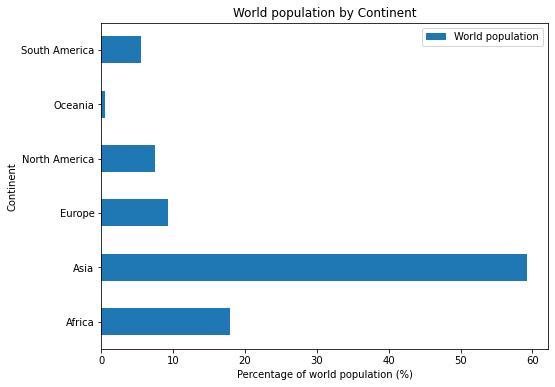

In [15]:
continents.plot(kind="barh", y='sum',figsize=(8,6),label='World population')
plt.xlabel("Percentage of world population (%)")
plt.title("World population by Continent")

([<matplotlib.patches.Wedge at 0x15cd2f268e0>,
 [Text(0.7933226911635385, 0.7619967898128187, 'Africa'),
  Text(-0.6489509921990213, 0.8881793792494318, 'Europe'),
  Text(-1.0119773781913737, -0.43116329392576286, 'Asia'),
  Text(0.04429258293469795, -1.099107896021575, 'North America'),
  Text(0.8520655026864785, -0.6956898584366735, 'Oceania'),
  Text(1.0806265254874028, -0.20553907758142614, 'South America')],
 [Text(0.4327214679073846, 0.4156346126251738, '24.4%'),
  Text(-0.3539732684721934, 0.4844614795905991, '21.4%'),
  Text(-0.5519876608316583, -0.23517997850496153, '21.4%'),
  Text(0.024159590691653424, -0.59951339782995, '17.1%'),
  Text(0.4647630014653519, -0.3794671955109128, '9.8%'),
  Text(0.589432650265856, -0.11211222413532333, '6.0%')])

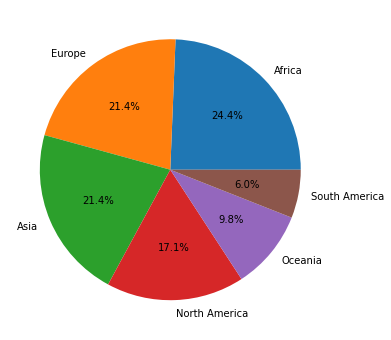

In [17]:
plt.subplots(figsize=(6,6))
plt.pie(data['Continent'].value_counts(),labels=['Africa', 'Europe', 'Asia', 'North America', 'Oceania','South America'],autopct="%1.1f%%")

<AxesSubplot:xlabel='Continent', ylabel='count'>

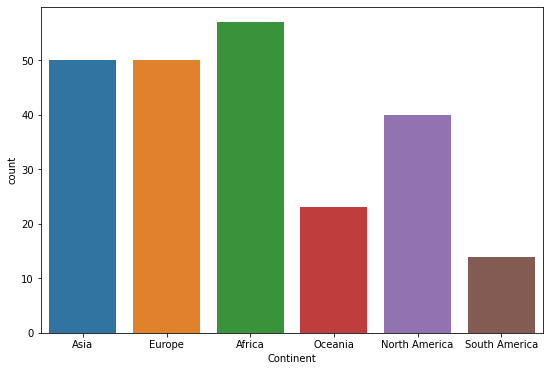

In [18]:
plt.subplots(figsize=(9,6))
plt.ylabel("Number of countries per continent")
sns.countplot(x='Continent',data=data)

In [20]:
data.groupby('Continent')['Area (km²)'].sum()

Continent
Africa           30317963
Asia             32138141
Europe           23010411
North America    24244178
Oceania           8515081
South America    17833382
Name: Area (km²), dtype: int64

Text(0.5, 1.0, 'Area (km2) per continent')

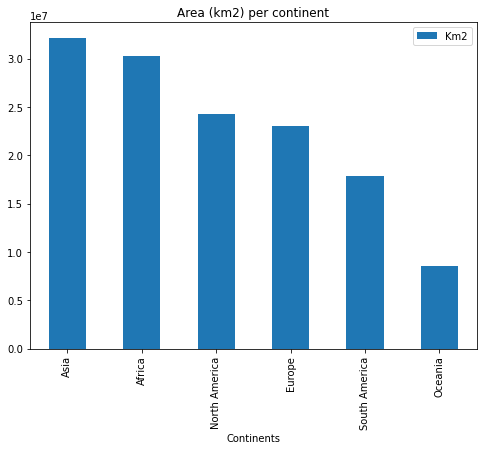

In [23]:
continents_area = data.groupby(['Continent'],as_index=False)['Area (km²)'].sum().sort_values(by='Area (km²)', ascending=False)
continents_area.plot(kind="bar", x= 'Continent', y='Area (km²)',figsize=(8,6),label='Km2')
plt.xlabel("Continents")
plt.title("Area (km2) per continent")

In [25]:
top10 = data.nlargest(10,['2022 Population','World Population Percentage'])
top10

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
171,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81
131,10,MEX,Mexico,Mexico City,North America,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375,64.9082,1.0063,1.60


<AxesSubplot:ylabel='Country'>

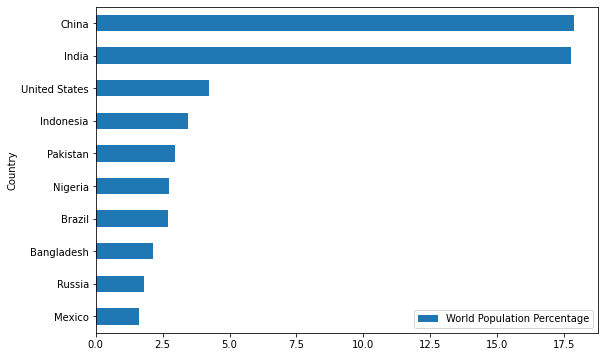

In [27]:
top10.sort_values('World Population Percentage', inplace=True)
top10.plot(kind='barh',x="Country",y="World Population Percentage",figsize=(9,6))

In [36]:
last10 = data.nsmallest(10,['Area (km²)']).sort_values(by='Area (km²)',ascending=False)
last10= last10.loc[:,['Country','2022 Population','Area (km²)','Density (per km²)']]
last10

,Country,2022 Population,Area (km²),Density (per km²)
176,Saint Martin,31791,53,599.8302
188,Sint Maarten,44175,34,1299.2647
119,Macau,695168,30,23172.2667
216,Tuvalu,11312,26,435.0769
142,Nauru,12668,21,603.2381
173,Saint Barthelemy,10967,21,522.2381
209,Tokelau,1871,12,155.9167
76,Gibraltar,32649,6,5441.5000
134,Monaco,36469,2,18234.5000
226,Vatican City,510,1,510.0000


<AxesSubplot:ylabel='Country'>

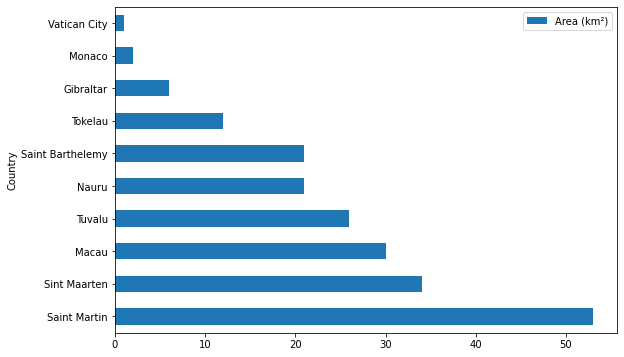

In [37]:
last10.plot(kind='barh',x="Country",y="Area (km²)",figsize=(9,6))

In [38]:
data.loc[:,['Country','2022 Population','Area (km²)','Density (per km²)',]].sort_values(by='Density (per km²)',ascending=False).head(10)

,Country,2022 Population,Area (km²),Density (per km²)
119,Macau,695168,30,23172.2667
134,Monaco,36469,2,18234.5000
187,Singapore,5975689,710,8416.4634
89,Hong Kong,7488865,1104,6783.3922
76,Gibraltar,32649,6,5441.5000
15,Bahrain,1472233,765,1924.4876
123,Maldives,523787,300,1745.9567
125,Malta,533286,316,1687.6139
188,Sint Maarten,44175,34,1299.2647
22,Bermuda,64184,54,1188.5926


In [39]:
data[data['World Population Percentage'] > 2].sort_values(by='Rank')

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15
